# ANALISI INDAGINE

## 1. IMPORTS ALL NECESSARY LIBRARIES

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## 2. DATASET IMPORT AND CLEANING

In [3]:
# imports dataset

path = "Thesis.csv"
df_ = pd.read_csv(path)
df = df_.drop(index=[0,1]).reset_index(drop=True).copy()

# basic cleaning

for col in ["Finished", "Progress"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

if "Finished" in df.columns:
    df = df[df["Finished"].str.lower().isin(["true", "1", "yes"])]
if "Status" in df.columns:
    df = df[df["Status"].str.lower() != "survey preview"]

# renames Q*

rename_map = {}
for col in df.columns:
    if col.isdigit():
        rename_map[col] = f"Q{int(col)}"
    if "_TEXT" in col and col.split("_")[0].isdigit():
        q = col.split("_")[0]
        rename_map[col] = f"Q{q}_TEXT"
    if "_" in col and col.split("_")[0].isdigit() and not col.endswith("_TEXT"):
        q = col.split("_")[0]
        rest = "_".join(col.split("_")[1:])
        rename_map[col] = f"Q{q}_{rest}"

df = df.rename(columns=rename_map)
if "Q17" in df.columns: df = df.rename(columns={"Q17": "Q19_office"})
if "Q18" in df.columns: df = df.rename(columns={"Q18": "Q20_seniority"})

display("Data preview:", df.head(5))

'Data preview:'

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q13_TEXT,Q14,Q14_TEXT,Q15,Q15_TEXT,Q16,Q16_TEXT,Q19_office,Q20_seniority,Q_DataPolicyViolations
1,2025-07-30 18:57:45,2025-07-30 19:01:35,IP Address,NaN,100,229,True,2025-07-30 19:01:36,R_2EzC7lONNPPLHkZ,NaN,...,NaN,"GPT for advanced analytics,GPT for automatic c...",NaN,"Reduction in working time,Improvement of outpu...",NaN,"Time savings,Improved client-perceived quality",NaN,Germany,Associate,NaN
2,2025-07-30 19:03:04,2025-07-30 19:04:31,IP Address,NaN,100,87,True,2025-07-30 19:04:31,R_80TiZxhgd9EOKXp,NaN,...,NaN,"GPT for advanced analytics,GPT for automatic c...",NaN,Reduction in working time,NaN,"Time savings,Improved client-perceived quality...",NaN,Belgium,Partner,NaN
3,2025-07-30 18:58:46,2025-07-30 19:04:54,IP Address,NaN,100,368,True,2025-07-30 19:04:55,R_8AF3dlBiHTFbUeO,NaN,...,NaN,"GPT for advanced analytics,GPT for workshop ma...",NaN,Reduction in working time,NaN,"Time savings,Improved client-perceived quality...",NaN,Germany,Associate,NaN
4,2025-07-30 19:08:51,2025-07-30 19:10:29,IP Address,NaN,100,97,True,2025-07-30 19:10:29,R_83kbhp8i7xdE6HD,NaN,...,NaN,GPT for advanced analytics,NaN,Reduction in working time,NaN,Time savings,NaN,United Kingdom,Associate,NaN
5,2025-07-30 19:13:20,2025-07-30 19:16:30,IP Address,NaN,100,190,True,2025-07-30 19:16:30,R_2eVs6t8YWo5h2MP,NaN,...,NaN,"GPT for advanced analytics,GTP for time manage...",NaN,Reduction in working time,NaN,"Time savings,Error reduction,Increased operati...",NaN,Germany,Consultant,NaN


## 2. DATA ANALYSIS
### 2.1 Q1 - Q2: Frequencies, crosstab, chi-squared

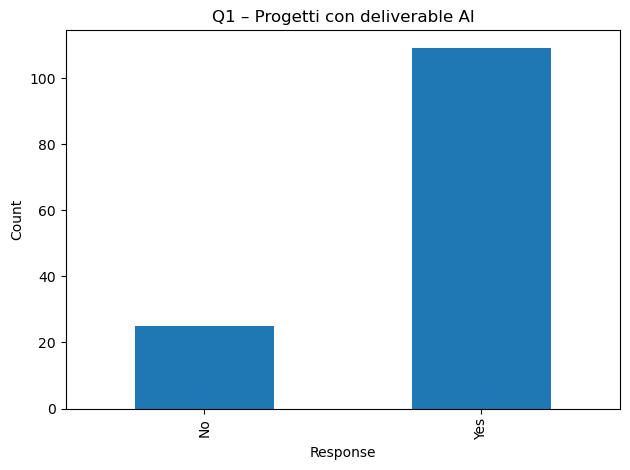

'Q1 × Q20 (counts)'

Q1,No,Yes
Q20_seniority,,
Associate,9,27
Consultant,8,41
Intern,0,13
Partner,1,2
Principal,2,7
Project leader,5,19


'Q1 × Q20 (row%)'

Q1,No,Yes
Q20_seniority,,
Associate,25.00,75.00
Consultant,16.33,83.67
Intern,0.00,100.00
Partner,33.33,66.67
Principal,22.22,77.78
Project leader,20.83,79.17


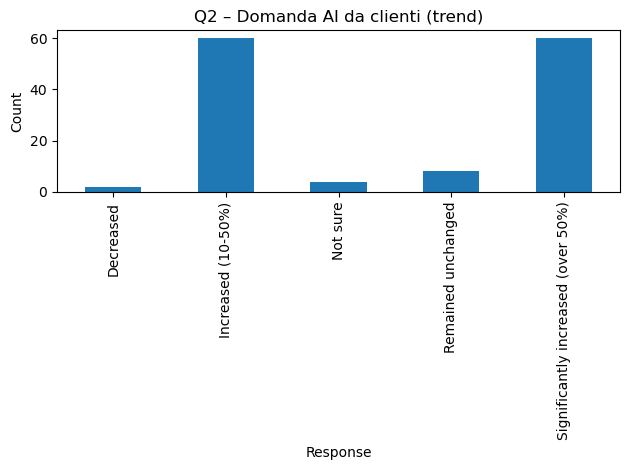

'Q2 × Q19 (counts)'

Q2,Decreased,Increased (10-50%),Not sure,Remained unchanged,Significantly increased (over 50%)
Q19_office,,,,,
Austria,0,7,0,0,6
Belgium,0,2,1,0,3
Denmark,0,2,0,0,1
Finland,0,1,0,0,1
France,0,0,0,0,7
Germany,0,7,0,1,4
Greece,0,2,0,0,3
Italy,2,19,1,5,8
Netherlands,0,2,0,0,1


'Q2 × Q19 (row%)'

Q2,Decreased,Increased (10-50%),Not sure,Remained unchanged,Significantly increased (over 50%)
Q19_office,,,,,
Austria,0.00,53.85,0.00,0.00,46.15
Belgium,0.00,33.33,16.67,0.00,50.00
Denmark,0.00,66.67,0.00,0.00,33.33
Finland,0.00,50.00,0.00,0.00,50.00
France,0.00,0.00,0.00,0.00,100.00
Germany,0.00,58.33,0.00,8.33,33.33
Greece,0.00,40.00,0.00,0.00,60.00
Italy,5.71,54.29,2.86,14.29,22.86
Netherlands,0.00,66.67,0.00,0.00,33.33


Chi-squared Q2×Q19: {'chi2': 47.14722471972472, 'p_value': 0.7942464305239172, 'dof': 56}


In [5]:
output = "./outputs"
os.makedirs(output, exist_ok=True)

# definition of useful functions

# save function
def save_table(df, name):
    path = os.path.join(output, f"{name}.csv")
    df.to_csv(path, index=True)
    return path

# chi_square calculator
def chi_square_np(series, by):
    table = pd.crosstab(by, series, dropna=False)
    if table.shape[0] < 2 or table.shape[1] < 2:
        return {"chi2": np.nan, "p_value": np.nan, "dof": np.nan}
    obs = table.values
    exp = (obs.sum(axis=1, keepdims=True) @ obs.sum(axis=0, keepdims=True)) / obs.sum()
    chi2 = np.nansum((obs-exp)**2/exp)
    dof = (obs.shape[0]-1)*(obs.shape[1]-1)
    try:
        from scipy.stats import chi2 as chi2_dist
        p = float(chi2_dist.sf(chi2, dof))
    except Exception:
        p = np.nan
    return {"chi2": float(chi2), "p_value": p, "dof": int(dof)}

# bar-plot builder
def bar_plot(series, title, fname):
    freq = series.value_counts(dropna=False).sort_index()
    plt.figure()
    freq.plot(kind="bar")
    plt.title(title); plt.ylabel("Count"); plt.xlabel("Response"); plt.tight_layout()
    plt.savefig(fname, dpi=150); plt.show()

# Q1 operations

if "Q1" in df.columns:
    q1 = df["Q1"]
    tab_q1 = q1.value_counts(dropna=False).rename_axis("Q1").to_frame("Count")
    tab_q1["Percent"] = (tab_q1["Count"]/len(q1)*100).round(2)
    save_table(tab_q1, "Q1_freq")
    bar_plot(q1, "Q1 – Progetti con deliverable AI", os.path.join(output, "Q1_bar.png"))
    if "Q20_seniority" in df.columns:
        ct = pd.crosstab(df["Q20_seniority"], q1, dropna=False)
        save_table(ct, "Q1xQ20_counts")
        save_table(ct.div(ct.sum(axis=1), axis=0).mul(100).round(2), "Q1xQ20_rowpct")
        display("Q1 × Q20 (counts)", ct)
        display("Q1 × Q20 (row%)", ct.div(ct.sum(axis=1), axis=0).mul(100).round(2))

# Q2 operations 

if "Q2" in df.columns:
    q2 = df["Q2"]
    tab_q2 = q2.value_counts(dropna=False).rename_axis("Q2").to_frame("Count")
    tab_q2["Percent"] = (tab_q2["Count"]/len(q2)*100).round(2)
    save_table(tab_q2, "Q2_freq")
    bar_plot(q2, "Q2 – Domanda AI da clienti (trend)", os.path.join(output, "Q2_bar.png"))
    if "Q19_office" in df.columns:
        ct2 = pd.crosstab(df["Q19_office"], q2, dropna=False)
        save_table(ct2, "Q2xQ19_counts")
        save_table(ct2.div(ct2.sum(axis=1), axis=0).mul(100).round(2), "Q2xQ19_rowpct")
        display("Q2 × Q19 (counts)", ct2)
        display("Q2 × Q19 (row%)", ct2.div(ct2.sum(axis=1), axis=0).mul(100).round(2))
        print("Chi-squared Q2×Q19:", chi_square_np(q2, df["Q19_office"]))

### 2.2 Multichoice (Q3, Q4, Q6, Q8, Q9, Q16)

'Q3 – Settori – tabella'

,Count,Percent of respondents
Q3,,
Financial services,84,62.69
Public sector,55,41.04
Healthcare,49,36.57
Energy,46,34.33
Consumer goods,40,29.85
TMT,20,14.93
Industrial Goods,16,11.94
Other (specify),5,3.73


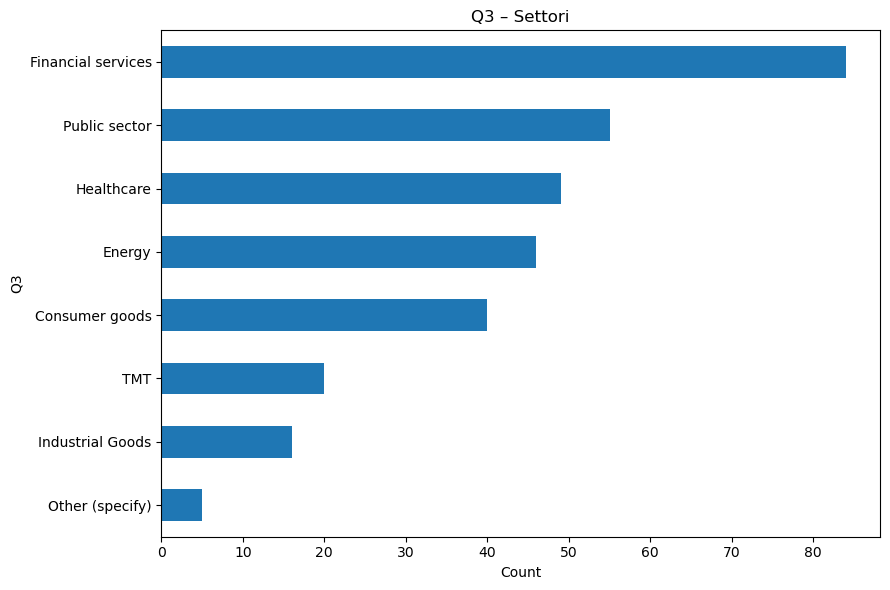

'Q4 – Valore richiesto – tabella'

,Count,Percent of respondents
Q4,,
Operational efficiency,115,85.82
Offer personalization,73,54.48
Strategic decision support,35,26.12
Product / service innovation,27,20.15
In-depth insights,23,17.16
Other (specify),3,2.24


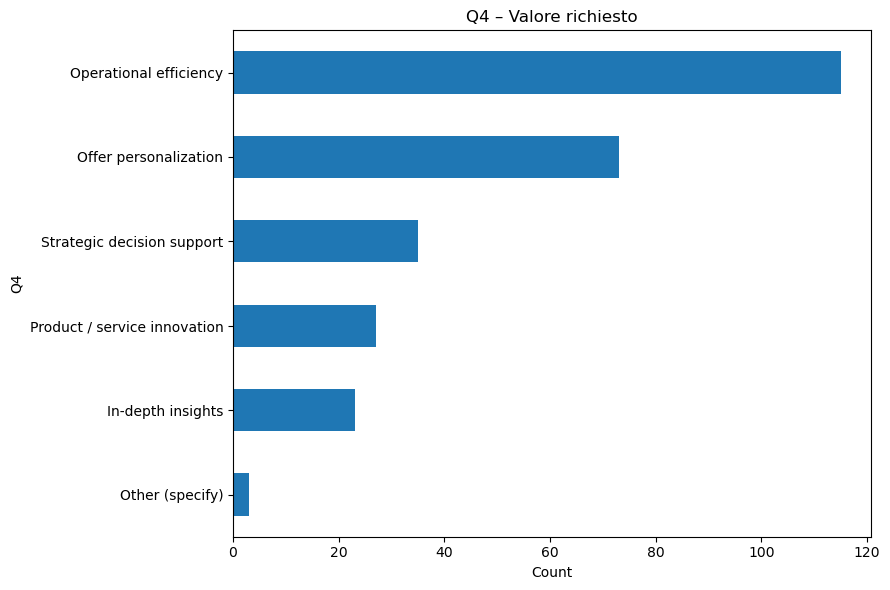

'Q6 – GPT usati più spesso – tabella'

,Count,Percent of respondents
Q6,,
Setup and kick-off,79,59.40
Analysis and research,67,50.38
Output production (slides,59,44.36
documents,59,44.36
...),59,44.36
Project finalization (internal delivery / reporting),45,33.83
Internal interaction / brainstorming,34,25.56
Others (specify),5,3.76


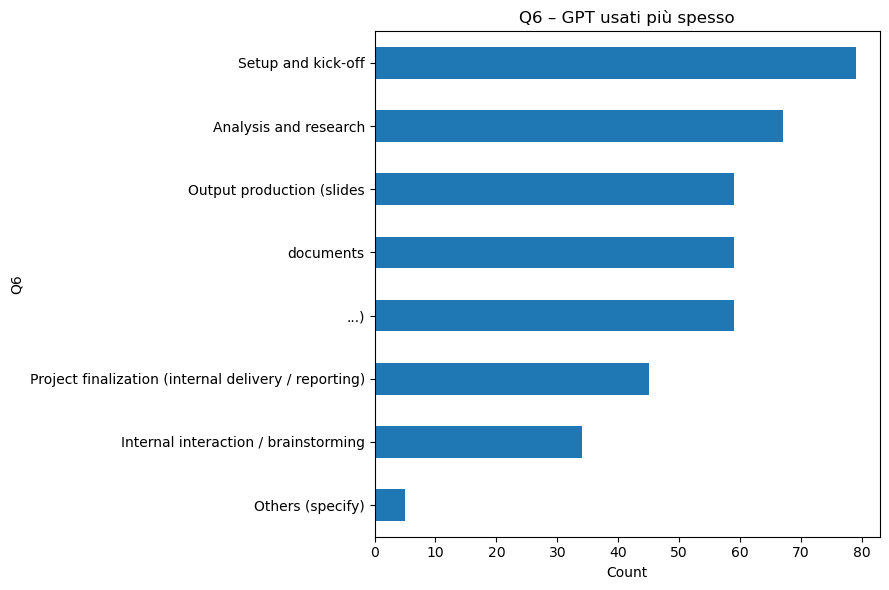

'Q8 – Driver barriere – tabella'

,Count,Percent of respondents
Q8,,
Quality of inputs,80,59.70
Lack of training,57,42.54
Technical limitations,45,33.58
Ease of use,35,26.12
Others (specify),18,13.43


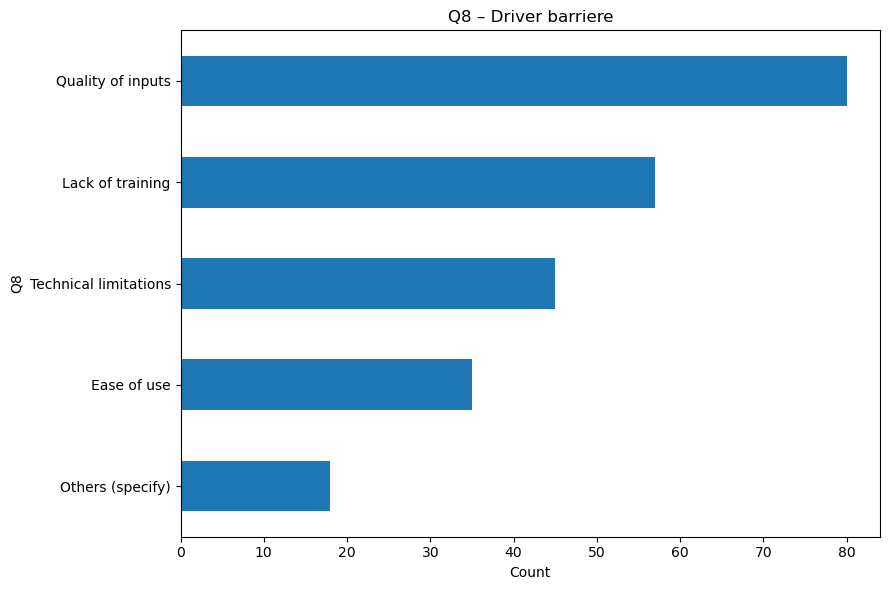

'Q9 – Barriere percepite – tabella'

,Count,Percent of respondents
Q9,,
Data anlysis,56,41.79
Research and benchmarking,47,35.07
Workshop / client meeting preparation,38,28.36
Final reporting,25,18.66
Content generation,24,17.91
Other (specify),19,14.18


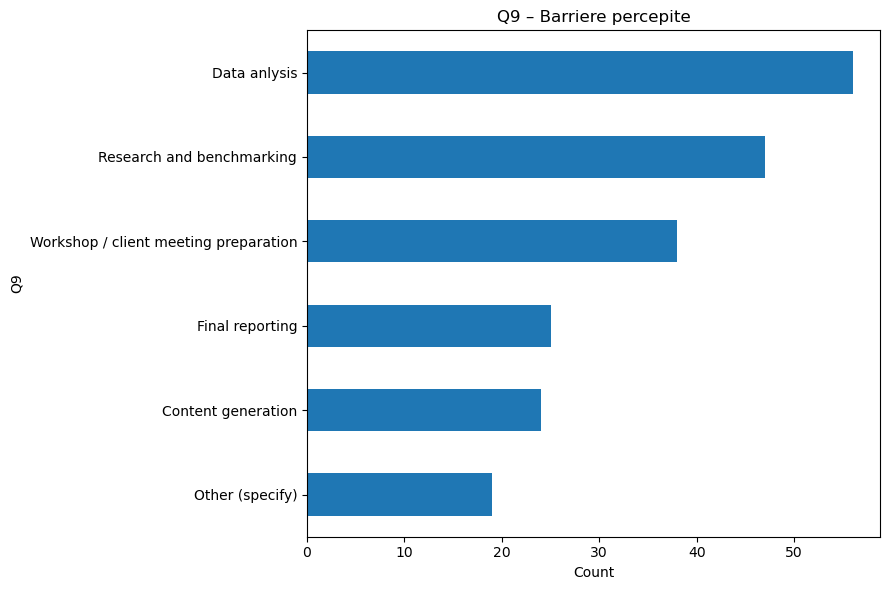

'Q16 – GPT desiderati – tabella'

,Count,Percent of respondents
Q16,,
Time savings,98,73.13
Improved client-perceived quality,81,60.45
Increased operational efficiency,62,46.27
Error reduction,31,23.13


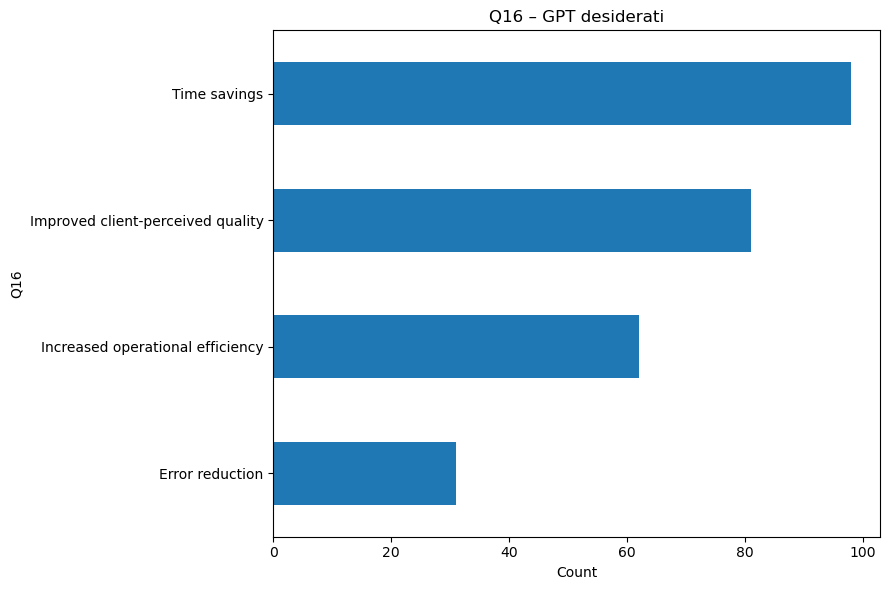

In [7]:
# definition of useful functions

# split function
def split_multiselect(s, sep=","):
    return s.dropna().astype(str).str.split(sep).explode().str.strip().pipe(lambda x: x[x!=""])

# counter
def multiselect_counts(s, title, basename):
    vals = split_multiselect(s)
    counts = vals.value_counts().to_frame("Count")
    counts["Percent of respondents"] = (counts["Count"]/s.notna().sum()*100).round(2)
    display(title+" – tabella", counts)
    plt.figure(figsize=(9,6))
    counts["Count"].iloc[::-1].plot(kind="barh")
    plt.title(title); plt.xlabel("Count"); plt.tight_layout()
    plt.savefig(os.path.join(output, f"{basename}_bar.png"), dpi=150); plt.show()
    counts.to_csv(os.path.join(output, f"{basename}_counts.csv"))

# Q3,Q4,Q6,Q8,Q9,Q16 operations
for q, name in [(3,"Q3 – Settori"), (4,"Q4 – Valore richiesto"),
                (6,"Q6 – GPT usati più spesso"), (8,"Q8 – Driver barriere"),
                (9,"Q9 – Barriere percepite"), (16,"Q16 – GPT desiderati")]:
    col = f"Q{q}"
    if col in df.columns:
        multiselect_counts(df[col], name, f"Q{q}")

### 2.3 Q5 (ordinal) – Frequencies and seniority boxplot

"Q5 – Frequenza d'uso"

,Count,Percent
Q5,,
Never,2,1.49
Rarely,8,5.97
A few times a week,5,3.73
Once a day,16,11.94
Several times a day,103,76.87


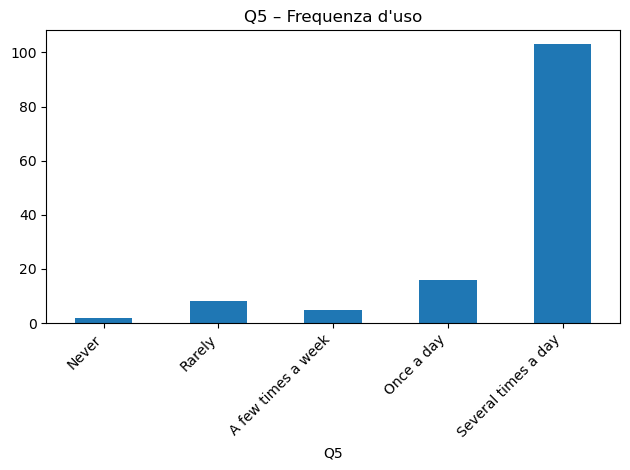

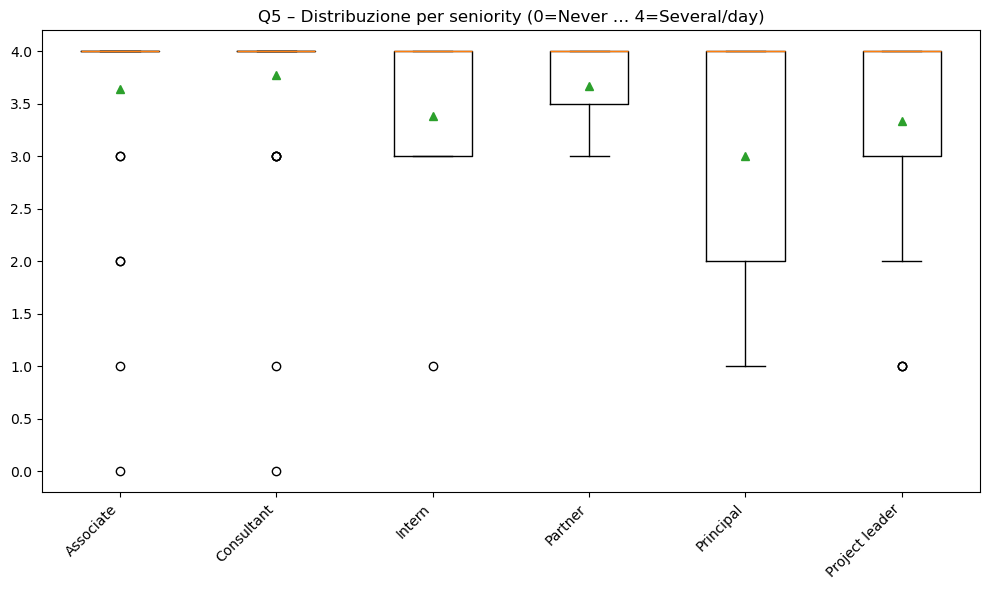

In [9]:
# calculates frequencies and plots results
if "Q5" in df.columns:
    order = ["Never","Rarely","A few times a week","Once a day","Several times a day"]
    mapping = {lab:i for i,lab in enumerate(order)}
    q5 = df["Q5"].dropna().astype(str)
    freq = q5.value_counts().reindex(order).fillna(0).astype(int).to_frame("Count")
    freq["Percent"] = (freq["Count"]/q5.shape[0]*100).round(2)
    display("Q5 – Frequenza d'uso", freq)
    plt.figure(); freq["Count"].plot(kind="bar"); plt.title("Q5 – Frequenza d'uso")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout()
    plt.savefig(os.path.join(output,"Q5_bar.png"), dpi=150); plt.show()
    
    # seniority box-plot
    if "Q20_seniority" in df.columns:
        tmp = pd.DataFrame({"score": df["Q5"].map(mapping), "seniority": df["Q20_seniority"]}).dropna()
        groups = [g["score"].values for _,g in tmp.groupby("seniority")]
        labels = [str(k) for k,_ in tmp.groupby("seniority")]
        plt.figure(figsize=(10,6)); plt.boxplot(groups, labels=labels, showmeans=True)
        plt.title("Q5 – Distribuzione per seniority (0=Never … 4=Several/day)")
        plt.xticks(rotation=45, ha="right"); plt.tight_layout()
        plt.savefig(os.path.join(output,"Q5_box_by_seniority.png"), dpi=150); plt.show()

### 2.4 Q7 – Heatmap: phase × seniority (mean 1–5)

'Q7 – Media per fase'

,Mean (1–5)
8. Quickly rate the internal value generated by the GPT Store (from 1 = No value to 5 = Extremely... - Innovation and insights generated,3.417910
8. Quickly rate the internal value generated by the GPT Store (from 1 = No value to 5 = Extremely... - Quality of deliverables,3.522388
8. Quickly rate the internal value generated by the GPT Store (from 1 = No value to 5 = Extremely... - Internal efficiency and productivity,4.059701


'Q7 – Media per fase × seniority'

,8. Quickly rate the internal value generated by the GPT Store (from 1 = No value to 5 = Extremely... - Internal efficiency and productivity,8. Quickly rate the internal value generated by the GPT Store (from 1 = No value to 5 = Extremely... - Quality of deliverables,8. Quickly rate the internal value generated by the GPT Store (from 1 = No value to 5 = Extremely... - Innovation and insights generated
Q20_seniority,,,
Associate,3.94,3.50,3.39
Consultant,4.24,3.65,3.63
Intern,4.54,4.46,4.46
Partner,4.00,3.33,1.67
Principal,3.78,3.00,3.00
Project leader,3.71,3.00,2.83


/var/folders/rj/bgvj9ksd2n7_6_xvrkmbc4_r0000gn/T/ipykernel_23959/4061514699.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(); plt.savefig(os.path.join(output,"Q7_heatmap_phase_by_seniority.png"), dpi=150); plt.show()


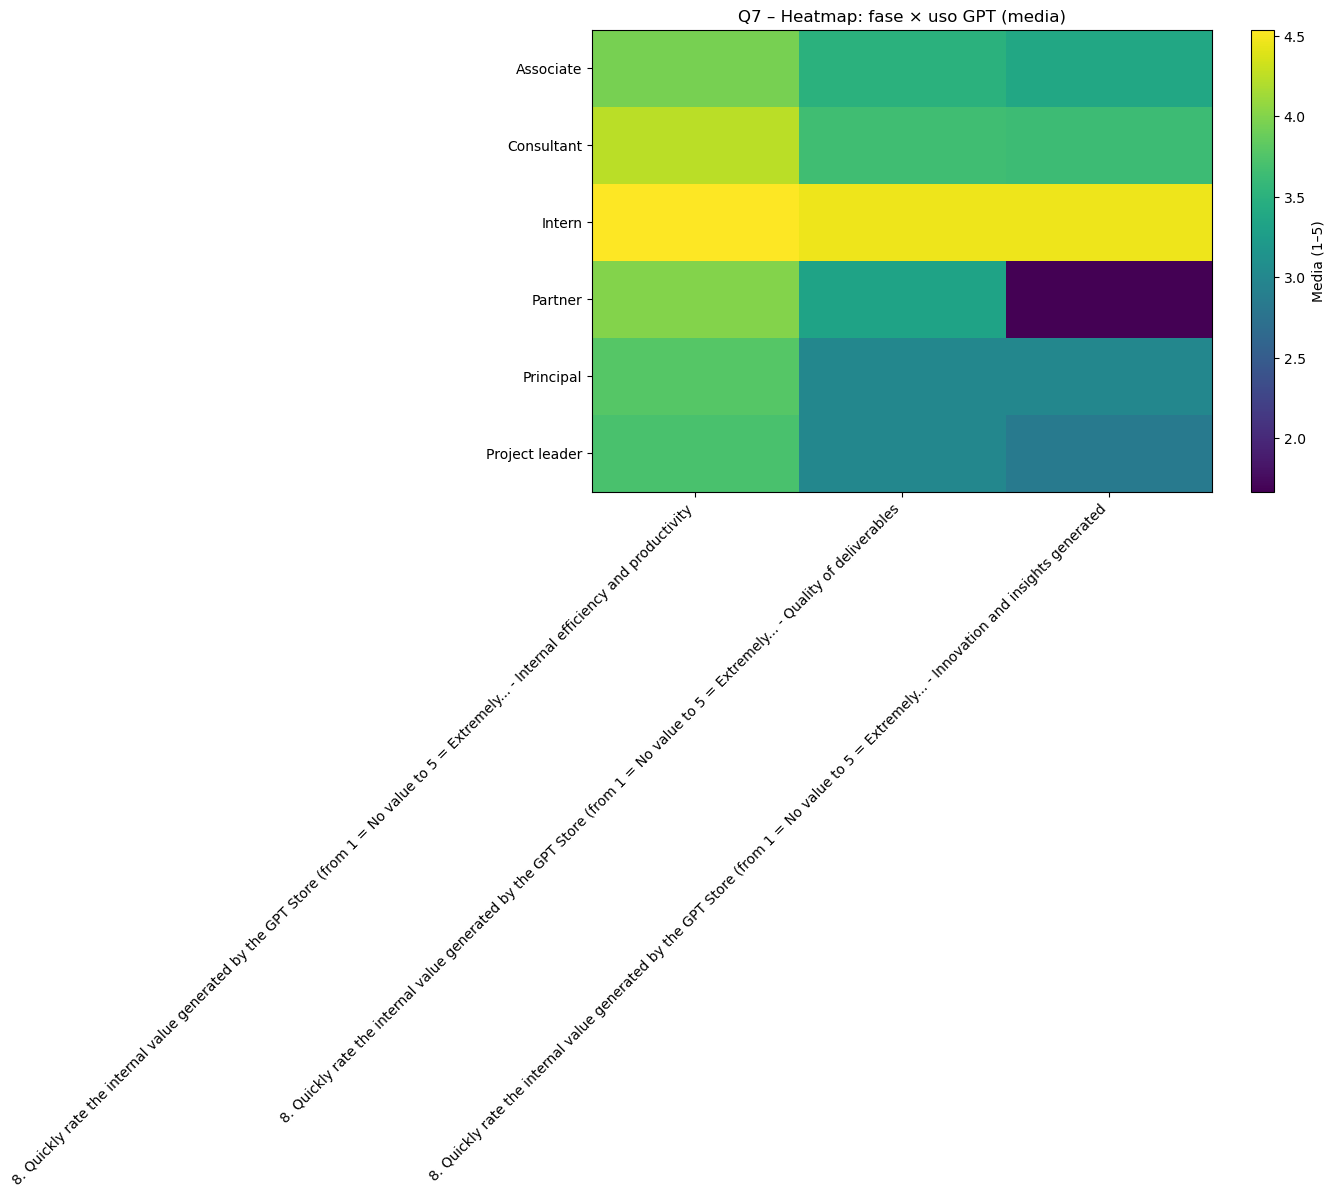

In [11]:
# reads question labels
raw_all = pd.read_csv(path)  
q7_cols = [c for c in df.columns if c.startswith("Q7_") and not c.endswith("_TEXT")]
# label mapping and mean calculation
if q7_cols:
    label_map = {}
    for qc in q7_cols:
        ok = qc.replace("Q","")
        label = str(raw_all.loc[0, ok]) if ok in raw_all.columns else qc
        label_map[qc] = label if label and label!="nan" else qc
    q7_df = df[q7_cols].apply(pd.to_numeric, errors="coerce").rename(columns=label_map)
    display("Q7 – Media per fase", q7_df.mean().to_frame("Mean (1–5)").sort_values("Mean (1–5)"))

    # heatmap 
    if "Q20_seniority" in df.columns:
        mat = pd.concat([df["Q20_seniority"], q7_df], axis=1).groupby("Q20_seniority").mean()
        display("Q7 – Media per fase × seniority", mat.round(2))
        fig, ax = plt.subplots(figsize=(10,6))
        im = ax.imshow(mat.values, aspect="auto")
        ax.set_xticks(range(mat.shape[1])); ax.set_xticklabels(mat.columns, rotation=45, ha="right")
        ax.set_yticks(range(mat.shape[0])); ax.set_yticklabels(mat.index)
        ax.set_title("Q7 – Heatmap: fase × uso GPT (media)"); fig.colorbar(im, ax=ax, label="Media (1–5)")
        plt.tight_layout(); plt.savefig(os.path.join(output,"Q7_heatmap_phase_by_seniority.png"), dpi=150); plt.show()

### 2.5 New dataset for open answers

In [13]:
text_cols = [c for c in df.columns if c.endswith("_TEXT") or c.lower().startswith("text")]
frames = []
for c in text_cols:
    s = df[c].dropna().astype(str)
    if not s.empty:
        tmp = pd.DataFrame({"Question": c, "Text": s})
        if "ResponseId" in df.columns:
            tmp["ResponseId"] = df.loc[s.index, "ResponseId"].values
        frames.append(tmp)
if frames:
    texts_df = pd.concat(frames, ignore_index=True)
    texts_df.to_csv("./outputs/free_text_responses.csv", index=False)
    display("Open answers preview:", texts_df.head(50))

'Open answers preview:'

,Question,Text,ResponseId
0,Q3_TEXT,Airline operations,R_83kbhp8i7xdE6HD
1,Q3_TEXT,TCI,R_80kr1nkJl8pLsvv
2,Q3_TEXT,no idea,R_2Xu50HVdsmMJvUJ
3,Q3_TEXT,Not sure,R_1PnSwD3s8m3uLao
4,Q3_TEXT,OPS (Operations),R_2kzb4NMMsYeZsIE
5,Q4_TEXT,marketing content,R_415reQiE5X2wkQq
6,Q4_TEXT,Revenue growth through Cross- and upsell and n...,R_84oqCxuOQoacVie
7,Q4_TEXT,Pricing,R_2kzb4NMMsYeZsIE
8,Q6_TEXT,Email/slide text polishing,R_2CpcWAFbGYAcrlV
9,Q6_TEXT,jkjl,R_2Xu50HVdsmMJvUJ


## 3. ADVANCED ANALYSIS

### 3.1 Useful function definition

In [15]:
# labels cleaning
def sanitize_label(s):
    s = str(s)
    s = re.sub(r'\s*\(.*?\)\s*', '', s)  # rimuove "(specify)" ecc.
    s = re.sub(r'[^0-9A-Za-z]+', '_', s)
    s = re.sub(r'_+', '_', s).strip('_')
    if s=='':
        s = 'empty'
    return s[:80]

# keep index while splitting
def split_multiselect_series(s, sep=','):
    s = s.fillna('').astype(str)
    out = {}
    for idx, val in s.items():
        if val.strip()=='':
            out[idx] = []
        else:
            items = [it.strip() for it in val.split(sep) if it.strip()!='']
            out[idx] = items
    return out

# series to df
def multiselect_dummies(s, prefix, sep=','):
    mapping = split_multiselect_series(s, sep=sep)
    choices = sorted({c for lst in mapping.values() for c in lst})
    cols = [f"{prefix}_{sanitize_label(c)}" for c in choices]
    df = pd.DataFrame(0, index=s.index, columns=cols)
    for idx, lst in mapping.items():
        for c in lst:
            col = f"{prefix}_{sanitize_label(c)}"
            if col in df.columns:
                df.at[idx, col] = 1
    return df

### 3.2 Feature engineering on Q5–Q13 for cluster and regression

In [17]:
features = pd.DataFrame(index=df.index)

# orders the list if label are different
if "Q5" in df.columns:
    order_q5 = ["Never", "Rarely", "A few times a week", "Once a day", "Several times a day"]
    mapping_q5 = {lab:i for i,lab in enumerate(order_q5)}
    features['Q5_num'] = df['Q5'].map(mapping_q5)

# Q6, Q8, Q9, Q12: multichoice -> dummies
for q in ["Q6","Q8","Q9","Q12"]:
    if q in df.columns:
        dummies = multiselect_dummies(df[q], prefix=q)
        features = pd.concat([features, dummies], axis=1)

# add on Q7 sub-numbers (es. Q7_1, Q7_2, ...)
q7_cols = [c for c in df.columns if c.startswith("Q7_") and not c.endswith("_TEXT")]
if q7_cols:
    # cconverts numerical and saves scores
    q7_num = df[q7_cols].apply(pd.to_numeric, errors='coerce')
    # renames labels with clearer names
    q7_num.columns = [f"Q7_{c.split('_',1)[1]}" for c in q7_num.columns]
    features = pd.concat([features, q7_num], axis=1)
    # adds mean
    features['Q7_mean'] = q7_num.mean(axis=1, skipna=True)

# Q10/Q11 will be used in gap analysis. Not included in features
# One-hot on Q13
if "Q13" in df.columns:
    # if Q13 is multichoice -> dummies, else get_dummies
    if df['Q13'].dropna().astype(str).str.contains(',').any():
        d13 = multiselect_dummies(df['Q13'], prefix='Q13')
    else:
        d13 = pd.get_dummies(df['Q13'].fillna('Missing'), prefix='Q13', dummy_na=False)
    features = pd.concat([features, d13], axis=1)

# Final control
print("Features shape:", features.shape)
print("Esempio colonne:", list(features.columns)[:40])
# Saves a copy
features.to_csv(os.path.join(output, "features_Q5_Q13_raw.csv"), index=False)
features.head()

Features shape: (134, 29)
Esempio colonne: ['Q5_num', 'Q6_empty', 'Q6_Analysis_and_research', 'Q6_Internal_interaction_brainstorming', 'Q6_Others', 'Q6_Output_production_slides', 'Q6_Project_finalization', 'Q6_Setup_and_kick_off', 'Q6_documents', 'Q8_Ease_of_use', 'Q8_Lack_of_training', 'Q8_Others', 'Q8_Quality_of_inputs', 'Q8_Technical_limitations', 'Q9_Content_generation', 'Q9_Data_anlysis', 'Q9_Final_reporting', 'Q9_Other', 'Q9_Research_and_benchmarking', 'Q9_Workshop_client_meeting_preparation', 'Q12_No', 'Q12_Yes', 'Q7_1', 'Q7_2', 'Q7_3', 'Q7_mean', 'Q13_Missing', 'Q13_No', 'Q13_Yes (please briefly specify)']


,Q5_num,Q6_empty,Q6_Analysis_and_research,Q6_Internal_interaction_brainstorming,Q6_Others,Q6_Output_production_slides,Q6_Project_finalization,Q6_Setup_and_kick_off,Q6_documents,Q8_Ease_of_use,...,Q9_Workshop_client_meeting_preparation,Q12_No,Q12_Yes,Q7_1,Q7_2,Q7_3,Q7_mean,Q13_Missing,Q13_No,Q13_Yes (please briefly specify)
1,1,0,0,0,0,0,0,1,0,1,...,0,0,1,3,4,2,3.000000,False,True,False
2,3,1,1,1,0,1,1,0,1,1,...,0,0,1,4,4,3,3.666667,False,True,False
3,4,1,0,0,0,1,0,1,1,0,...,0,0,1,4,3,2,3.000000,False,True,False
4,2,0,1,1,0,0,0,0,0,0,...,0,1,0,4,4,1,3.000000,True,False,False
5,1,0,1,0,0,0,0,1,0,1,...,0,0,1,4,3,3,3.333333,False,True,False


### 3.3 Preprocessing: imputation + scaling

In [19]:
# If there aren't numeric features, skips
if features.shape[1] == 0:
    raise RuntimeError("No features generated: check that Q5–Q13 exist in dataframe.")

# imputes median per numeric
imp = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imp.fit_transform(features), columns=features.columns, index=features.index)

# scaling (need for KMeans)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns, index=X_imputed.index)

# saves results
X_imputed.to_csv(os.path.join(output, "features_Q5_Q13_imputed.csv"), index=False)
X_scaled.to_csv(os.path.join(output, "features_Q5_Q13_scaled.csv"), index=False)
print("Imputation+scaling completed. Shape:", X_scaled.shape)

Imputation+scaling completed. Shape: (134, 29)


### 3.4 Cluster analysis (k-selection with silhouette + KMeans k* + profiles)

Silhouette scores for k: {2: 0.15100559836561253, 3: 0.15293059556744207, 4: 0.10863423909921474, 5: 0.12621667543775203, 6: 0.1362083606597534}
Choosed k = 3 (silhouette = 0.153)
Cluster dimension (counts):
cluster
1    69
2    51
0    14
Name: count, dtype: int64


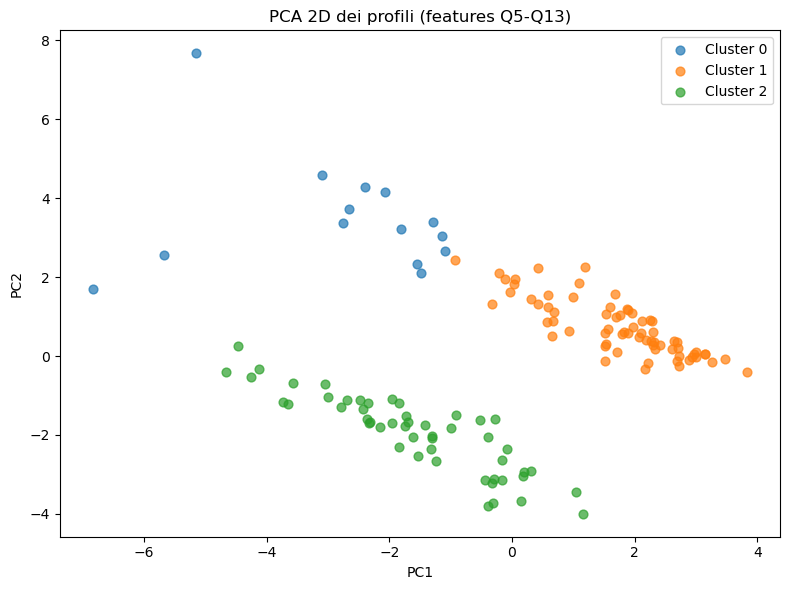

In [21]:
# k preparation for best results
best_k = None
best_score = -1
sil_scores = {}
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    try:
        s = silhouette_score(X_scaled, labels)
    except Exception as e:
        s = np.nan
    sil_scores[k] = s
    if not np.isnan(s) and s > best_score:
        best_score = s; best_k = k

print("Silhouette scores for k:", sil_scores)
if best_k is None:
    best_k = 3  # fallback
    print("No valid silhouette: use k=3 (fallback).")
else:
    print(f"Choosed k = {best_k} (silhouette = {best_score:.3f})")

# kmeans  fitting
km_final = KMeans(n_clusters=best_k, random_state=42, n_init=30)
labels_final = km_final.fit_predict(X_scaled)
df['cluster'] = labels_final

# saves results
df[['cluster']].to_csv(os.path.join(output, "respondent_clusters.csv"), index=True)

# cluster profile: numeric features means + % per binary columns
profile_num = X_imputed.groupby(df['cluster']).mean().round(3)
profile_num.to_csv(os.path.join(output, "cluster_profile_numeric_means.csv"))

# only for 0/1 columns calculates % with value 1 per cluster
binary_cols = [c for c in X_imputed.columns if set(X_imputed[c].dropna().unique()).issubset({0,1})]
profile_bin = X_imputed[binary_cols].groupby(df['cluster']).mean().multiply(100).round(2)
profile_bin.to_csv(os.path.join(output, "cluster_profile_binary_pct.csv"))

print("Cluster dimension (counts):")
print(df['cluster'].value_counts())

# PCA 2D for visual
pca = PCA(n_components=2, random_state=42)
pc = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
for lab in np.unique(labels_final):
    sel = labels_final == lab
    plt.scatter(pc[sel,0], pc[sel,1], label=f"Cluster {lab}", alpha=0.7, s=40)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA 2D dei profili (features Q5-Q13)")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output, "clusters_pca2d.png"), dpi=150)
plt.show()

### 3.5 Regression — (A) OLS on Q5_num, (B) Logistic (heavy user) 

In [23]:
# linear regression with OLS

# takes y target
if 'Q5_num' not in features.columns:
    raise RuntimeError("Q5_num missing. Check that Q5 is present.")

# builds X_reg using same features
X_reg = X_imputed.copy()  # imputed but not scaled (OLS no scaling needed)
y_reg = features['Q5_num']

# aligns index and removes Nan rows in y
mask = y_reg.notna()
X_reg = X_reg.loc[mask]
y_reg = y_reg.loc[mask]

# add constant for intercept
X_reg_sm = sm.add_constant(X_reg)
model_ols = sm.OLS(y_reg.astype(float), X_reg_sm).fit(cov_type='HC3')
print(model_ols.summary())

# summary saving
with open(os.path.join(output, "regression_OLS_Q5_summary.txt"), "w") as f:
    f.write(model_ols.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                 Q5_num   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.162e+29
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:01:27   Log-Likelihood:                 4110.8
No. Observations:                 134   AIC:                            -8174.
Df Residuals:                     110   BIC:                            -8104.
Df Model:                          23                                         
Covariance Type:                  HC3                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 24
  warnings.warn('covariance of constraints does not have full '


In [27]:
# logistic regression (heavy user)

# binary target: heavy user = Q5_num (max score)
max_q5 = features['Q5_num'].max()
y_bin = (features['Q5_num'] == max_q5).astype(int)

X_log = X_imputed.loc[y_bin.index]

# delete elements with Var=0
keep = X_log.loc[:, X_log.nunique() > 1]

# logit with regularization L2
lr = LogisticRegression(max_iter=300, class_weight='balanced', solver='lbfgs')
lr.fit(keep, y_bin)

print("Accuracy:", lr.score(keep, y_bin))
print("Class report:\n", classification_report(y_bin, lr.predict(keep)))

# ordering coefficients by importance
coef_table = pd.DataFrame({
    "feature": keep.columns,
    "coef": lr.coef_[0]
}).sort_values("coef", ascending=False)

# saves results
coef_table.to_csv(os.path.join(output, "logit_Q5_heavy_sklearn_coefs.csv"), index=False)
coef_table.head(20)


Accuracy: 1.0
Class report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00       103

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



,feature,coef
0,Q5_num,4.227469
19,Q9_Workshop_client_meeting_preparation,0.429550
10,Q8_Lack_of_training,0.399371
11,Q8_Others,0.318100
6,Q6_Project_finalization,0.270134
7,Q6_Setup_and_kick_off,0.226457
22,Q7_1,0.182290
5,Q6_Output_production_slides,0.168237
8,Q6_documents,0.168237
1,Q6_empty,0.168237


### 3.6 Gap analysis Q10 vs Q11 — Table & opportunity

,task,cnt_not_used,pct_not_used,cnt_fund,pct_fund,opportunity_score
0,Facilitate_internal_collaboration,31,23.13,0,0.0,0.0
1,Improve_output_quality,48,35.82,0,0.0,0.0
2,Introduce_innovation_in_deliverables,18,13.43,0,0.0,0.0
3,Others,6,4.48,0,0.0,0.0
4,Pressure_from_client_team,26,19.40,0,0.0,0.0
5,Reduce_time_spent_on_tasks,121,90.30,0,0.0,0.0


/var/folders/rj/bgvj9ksd2n7_6_xvrkmbc4_r0000gn/T/ipykernel_23959/1013840809.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.grid(True); plt.tight_layout()


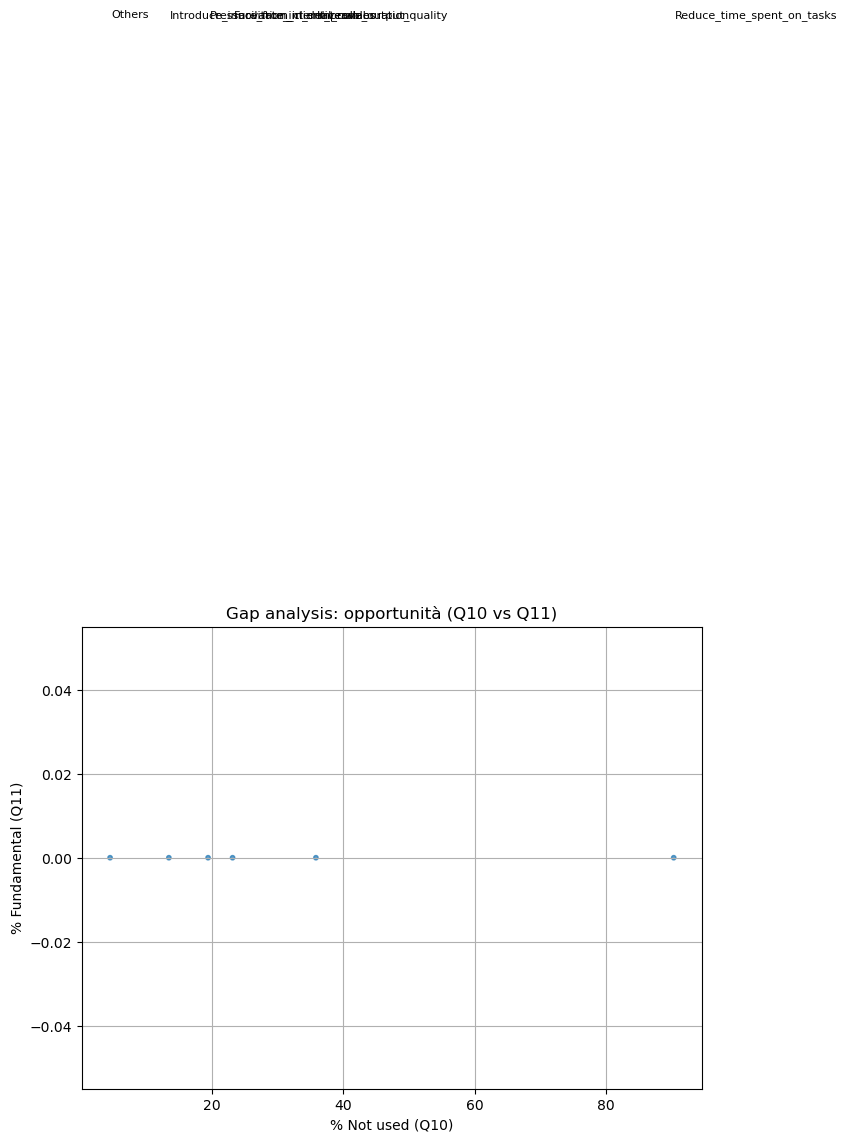

In [42]:
# empty dataset management
if "Q10" not in df.columns and "Q11" not in df.columns:
    print("Q10 and Q11 not present: no gap analysis.")
else:
    # new dummies
    df10 = multiselect_dummies(df["Q10"], prefix="Q10") if "Q10" in df.columns else pd.DataFrame(index=df.index)
    df11 = multiselect_dummies(df["Q11"], prefix="Q11") if "Q11" in df.columns else pd.DataFrame(index=df.index)

    if df10.shape[1] == 0 and df11.shape[1] == 0:
        print("Not valid data in Q10 o Q11: no gap analysis.")
    else:
        # mapping
        cols10 = {c.replace("Q10_", ""): c for c in df10.columns}
        cols11 = {c.replace("Q11_", ""): c for c in df11.columns}

        # labels ordering
        all_labels = sorted(set(cols10.keys()).union(set(cols11.keys())))
        rows = []
        n_resp = df.shape[0]
        
        # gap analysis
        for lab in all_labels:
            col10 = cols10.get(lab)
            col11 = cols11.get(lab)
            cnt_not_used = int(df10[col10].sum()) if col10 else 0
            cnt_fund     = int(df11[col11].sum()) if col11 else 0
            pct_not_used = round(100 * cnt_not_used / n_resp, 2)
            pct_fund     = round(100 * cnt_fund / n_resp, 2)
            opp_score    = round((pct_not_used * pct_fund) / 100.0, 3)
            rows.append({
                "task": lab, "cnt_not_used": cnt_not_used, "pct_not_used": pct_not_used,
                "cnt_fund": cnt_fund, "pct_fund": pct_fund, "opportunity_score": opp_score
            })

        gap_df = pd.DataFrame(rows).sort_values("opportunity_score", ascending=False)
        gap_df.to_csv(os.path.join(output, "gap_Q10_vs_Q11_opportunity.csv"), index=False)

        display(gap_df.head(40))

        # scatter plot
        plt.figure(figsize=(8,6))
        plt.scatter(gap_df['pct_not_used'], gap_df['pct_fund'],
                    s=(gap_df['opportunity_score']*10 + 10), alpha=0.7)
        for _, r in gap_df.head(12).iterrows():
            plt.text(r['pct_not_used']+0.2, r['pct_fund']+0.2, r['task'], fontsize=8)
        plt.xlabel("% Not used (Q10)"); plt.ylabel("% Fundamental (Q11)")
        plt.title("Gap analysis: opportunità (Q10 vs Q11)")
        plt.grid(True); plt.tight_layout()
        plt.savefig(os.path.join(output, "gap_Q10_vs_Q11_scatter.png"), dpi=150)
        plt.show()